In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. load data

In [2]:
cs_train = pd.read_csv('../cs-training.csv')
del cs_train['Unnamed: 0']
cs_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
cs_train.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
cs_train = cs_train.fillna(cs_train.mean().round())
cs_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,6670.0,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


Divide the dataset into training and testing sets and standardize them.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    cs_train.drop('SeriousDlqin2yrs', axis = 1), cs_train['SeriousDlqin2yrs'], 
    test_size=0.3, random_state=1, stratify=cs_train['SeriousDlqin2yrs'])

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 2. Use PCA to select features

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.29950629, 0.15290149, 0.12233353, 0.10135295, 0.09955708,
       0.09369868, 0.07397187, 0.05429838, 0.00170547, 0.00067426])

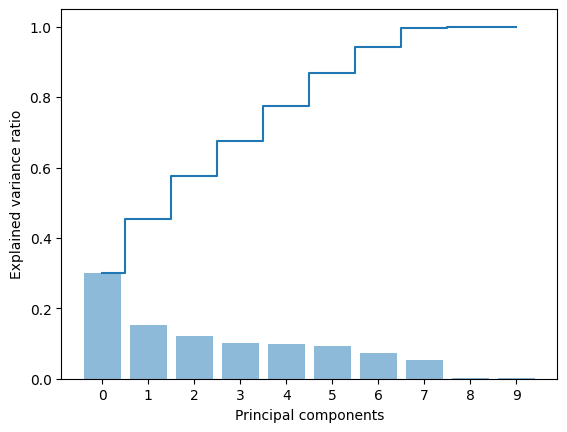

In [7]:
plt.bar(range(10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(10))
plt.show()

The variance can be explained by the former five factors are above 80%

so we select the first 5 features. 

In [8]:
pca = PCA(n_components=5) 
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

## 3. Pipeline and 5 folds CV

### LR

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(StandardScaler(), 
                        PCA(n_components=5),
                        LogisticRegression(random_state=1, solver='lbfgs'))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = {'logisticregression__C': param_range}

grid_lr = GridSearchCV(estimator=pipe_lr,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5)
grid_lr.fit(X_train, y_train)

print('The best performance are: %0.3f' % grid_lr.best_score_)

print('The best hyperparamet: \n', grid_lr.best_params_)

The best performance are: 0.933
The best hyperparamet: 
 {'logisticregression__C': 0.0001}


### SVM

In [14]:
from sklearn.svm import SVC

pipe_svm = make_pipeline(StandardScaler(), 
                         PCA(n_components=5),
                         SVC(random_state=1, max_iter=5000))

param_range = [ 0.001, 0.01, 0.1]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

# param_grid = [{'svc__C': param_range, 
#                'svc__kernel': ['linear']}]

grid_svm = GridSearchCV(estimator=pipe_svm,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3)
grid_svm.fit(X_train, y_train)

print('The best performance are: %0.3f' % grid_svm.best_score_)

print('The best hyperparamet: \n', grid_svm.best_params_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxS

The best performance are: 0.933
The best hyperparamet: 
 {'svc__C': 0.001, 'svc__kernel': 'linear'}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

pipe_tree = make_pipeline(StandardScaler(), 
                         PCA(n_components=5),
                         DecisionTreeClassifier(random_state=1))

param_range = [1, 2, 3, 4, 5, 6, 7, None]
param_grid = {'decisiontreeclassifier__max_depth': param_range }

grid_tree = GridSearchCV(estimator=pipe_tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5)
grid_tree.fit(X_train, y_train)

print('The best performance are: %0.3f' % grid_tree.best_score_)

print('The best hyperparamet: \n', grid_tree.best_params_)

The best performance are: 0.936
The best hyperparamet: 
 {'decisiontreeclassifier__max_depth': 4}
